In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [149]:
# Read in Cleaned Data
tot_data = pd.read_csv('Cleaned_data.csv', index_col=0)
data = tot_data[tot_data["Nation"] != "Approx. totals"].reset_index().iloc[:, 1:]
sum_data = tot_data[tot_data["Nation"] == "Approx. totals"].reset_index().iloc[:, 1:]

# data['Population'] = data['Population'].apply(lambda x: '%.0f' % x)  # Suppress scientific notation

In [158]:
# subsetting to if the country was in both wars
ww1_nations = data[data['War'] == "World War 1"]['Nation']
ww2_nations = data[data['War'] == "World War 2"]['Nation']
both_wars = ww1_nations[ww1_nations.isin(ww2_nations)]

both_wars_df = data[data["Nation"].isin(both_wars)].reset_index().iloc[:, 1:]
both_wars_df["Population Loss"] = both_wars_df["Population"] - both_wars_df["Total deaths"]

,Nation,Population,Total military deaths from all causes,Civilian deaths due to direct military action,Civilian deaths due to indirect military action,Total deaths,Deaths as percent of population,Military wounded,War
0,Approx. totals,9.597000e+08,9698645.0,2250099.0,6755500.0,18500000.0,0.0200,22883486.0,World War 1
1,Approx. totals,2.300000e+09,23250000.0,29750000.0,23500000.0,77500000.0,0.0335,NaN,World War 2


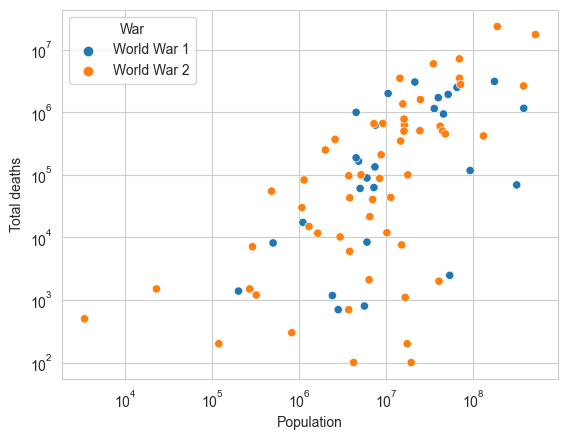

In [152]:
sns.set_style("whitegrid")

plt.xscale('log')
plt.yscale('log')
one = sns.scatterplot(x="Population", y = 'Total deaths', hue = 'War', data = data)
plt.show()

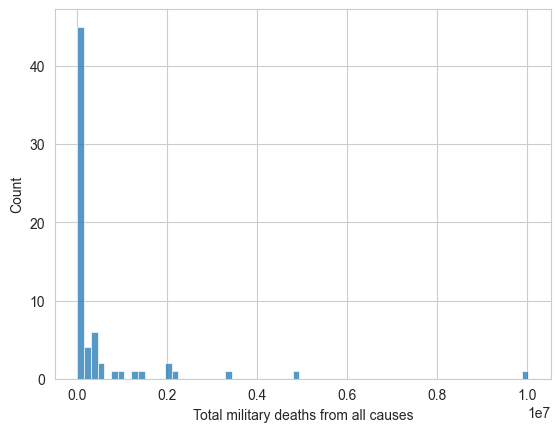

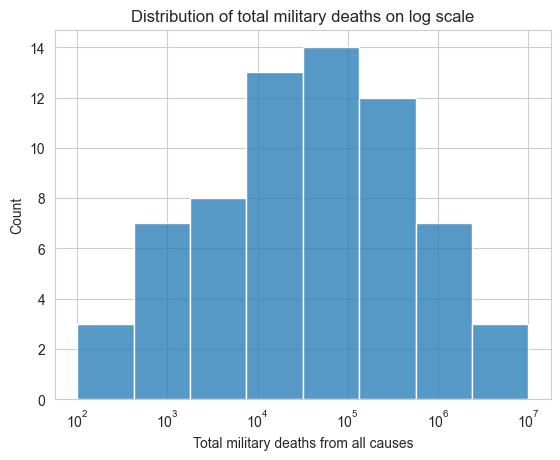

In [153]:
two = sns.histplot(x='Total military deaths from all causes', data = data)
plt.show()



plt.xscale('log')
three = sns.histplot(x=('Total military deaths from all causes'), 
                     data = data)
plt.title("Distribution of total military deaths on log scale")

plt.show()

Population


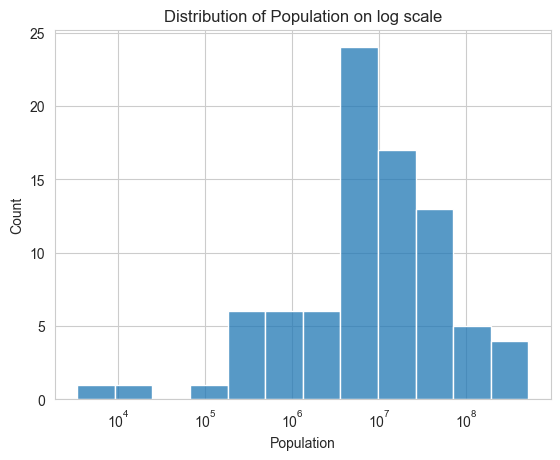

Total military deaths from all causes


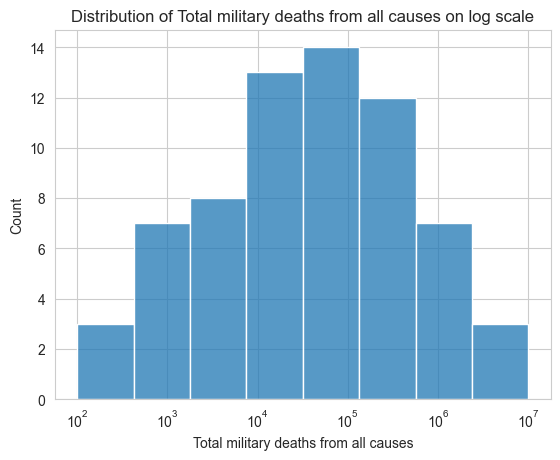

Civilian deaths due to direct military action


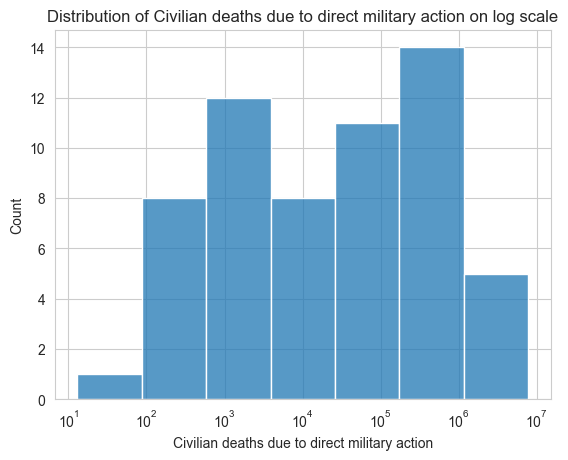

Civilian deaths due to indirect military action


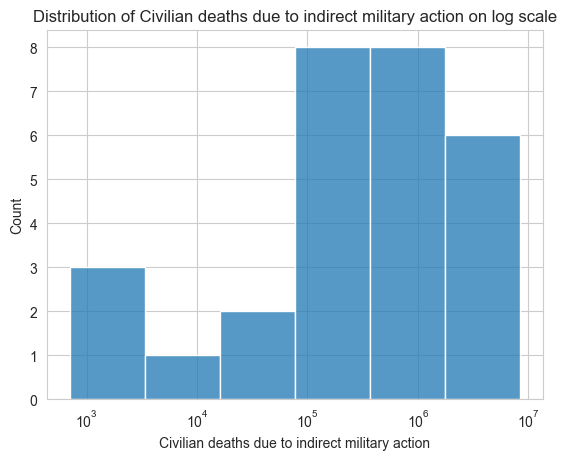

Total deaths


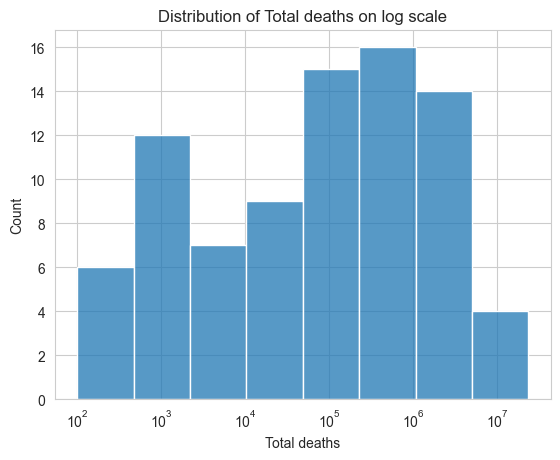

Military wounded


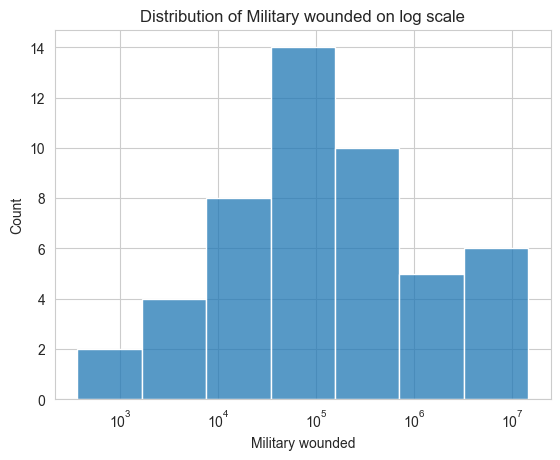

In [237]:

temp = data.columns.values.tolist()[1:-3] + [data.columns.values.tolist()[-2]]
for i in range(len(temp)):
    # print(temp[i])
    plt.xscale('log')
    sns.histplot(x=temp[i], data = data)
    plt.title(f"Distribution of {temp[i]} on log scale")
    plt.show()